# Análisis de datos del Titanic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Cangando datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv ("train.csv")
test = pd.read_csv ("test.csv")


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explorando datos

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Cómo se comportan las variables categóricas
train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 2.1 EDA: Estudio de variable target

### Target vs Sex

In [ ]:
train.groupby(["Survived"]).count()["PassengerId"]

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [ ]:
train.groupby(["Survived" , "Sex"]).count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


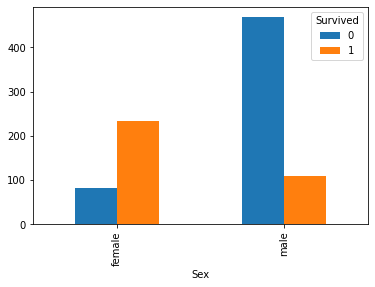

In [ ]:
grouped_sex = train.groupby(["Survived" , "Sex"]).count()["PassengerId"]
print(grouped_sex)
(grouped_sex.unstack(level = 0).plot.bar())
plt.show()

In [ ]:
grouped_sex.unstack(level = 0)

Survived,0,1
Sex,,
female,81,233
male,468,109


### Embarked vs Pclass

AxesSubplot(0.125,0.125;0.775x0.755)


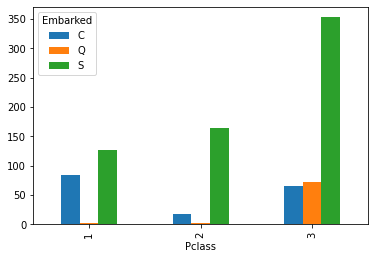

In [ ]:
print (train.groupby(["Embarked" , "Pclass"])
      .count()["PassengerId"]
      .unstack(level = 0)
      .plot.bar())

# 3. Procesamiento de datos 

### Se selecciona las variables con las que se quiere trabajar: Survived, Sex, Age, Pclass

In [ ]:
train[["Survived" , "Sex" , "Age" , "Pclass"]].head()

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


In [ ]:
train[["Survived" , "Sex" , "Age" , "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [ ]:
# Observar cómo se distribuyen los datos nulos en la variable edad
(train[train["Age"].isna()]
     .groupby(["Sex" , "Pclass"])
     .count()["PassengerId"]
     .unstack(level = 0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [ ]:
# Observar cómo se distribuyen los datos nulos de la variable Parch (parientes)

(train[train["Age"].isna()]
    .groupby(["SibSp" , "Parch"])
    .count()["PassengerId"]
    .unstack(level = 0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [ ]:
# Calcular mediana de Age para reemplazar nulos
train["Age"].median()

28.0

In [ ]:
# Imputar valor para rellenar nulos
train["Age"] = train["Age"].fillna(28.0)
train[["Survived" , "Sex" , "Age" , "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


#### Pasar la variable de Sex a int

In [ ]:
# map para label encoding
train["Sex"] = train["Sex"].map({"female" : 1 , "male" : 0}).astype(int)

In [ ]:
train[["Survived" , "Sex" , "Age" , "Pclass"]].head()

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


# 3.Crear variables

In [ ]:
# Crear nueva variable tipo flag "solo" (persona que viaja sola) (flag es cuando es 1 o 0) (1 cumple la condición y 0 no)
train["FlagSolo"] = np.where(
    (train["SibSp"] == 0) & (train["Parch"] == 0) , 1 , 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


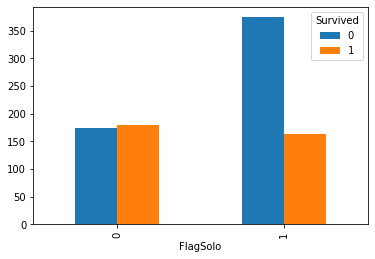

In [ ]:
grouped_flag = train.groupby (["Survived" , "FlagSolo"]).count()["PassengerId"]
print(grouped_flag)
(grouped_flag.unstack(level = 0).plot.bar())
plt.show()

In [ ]:
train[["Survived" , "Sex" , "Age" , "Pclass" , "FlagSolo"]].head()

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


#### Datos listos para hacer modelos

In [ ]:
# Variable dependiente 
Y_train = train["Survived"]

# Preprocesamiento de variables independientes
features = ["Sex" , "Age" , "Pclass" , "FlagSolo"]
X_train = train[features]

print(Y_train.shape , X_train.shape)

(891,) (891, 4)


# Modelos

### Se va a escoger dos modelos de prueba: Regresión logística y Árboles de decisión

In [ ]:
# Entrenando modelo de regresión logística
from sklearn.linear_model import LogisticRegression

loreg = LogisticRegression()
loreg.fit(X_train , Y_train)

LogisticRegression()

In [ ]:
# Entrenando modelo de árboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit (X_train , Y_train)

DecisionTreeClassifier()

# Evaluación

### Matriz de confusión (comparativa de valores reales con valores predichos)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo , X_train , Y_train , 
                                cmap = plt.cm.Blues , values_format = "d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print("accuracy: " , np.round(accuracy , 2))
    plt.show()

accuracy:  0.79


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


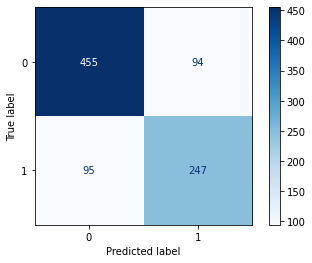

In [ ]:
conf_mat_acc(loreg)
# accuracy → presición

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.89


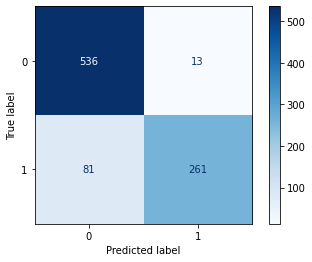

In [ ]:
conf_mat_acc(decision_tree)

# Evaluación en el test set

In [ ]:
# Preparar el test set para la evaluación

print(test.head())
test.info()

   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Preparando test set

# Hacer map a Sex
test["Sex"] = test["Sex"].map({"female" : 1 , "male" : 0}).astype(int)

# Rellenar Age
test["Age"] = test["Age"].fillna(28.0)

# Crear FlagSolo
test["FlagSolo"] = np.where(
    (test["SibSp"] == 0) & (test["Parch"] == 0) , 1 , 0)

In [ ]:
print(test.info())
test[features].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1
3,0,27.0,3,1
4,1,22.0,3,0


In [ ]:
# Crear test set
X_test = test[features]

print(X_test.shape)

(418, 4)


In [ ]:
# Predicción de Survived en test set
Y_pred_log = loreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0 : 10])

[0 0 0 0 1 0 1 0 1 0]


# 6. Predicción

In [ ]:
# Prediciendo sobre el test set
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [ ]:
# Para guardar en ordenador
def download_output(y_pred, name):
    output = pd.DataFrame({"PassangerId" : test.PassengerId,
                          "Survived" : y_pred})
    output.to_csv(name , index = False)

In [ ]:
download_output(Y_pred_log , "alberto_pred_log.csv")
download_output(Y_pred_tree , "alberto_pred_tree.csv")